In [1]:
import os
from pathlib import Path

current_path = "/root/autodl-tmp/dude-single"

all_paths = [os.path.join(current_path, x) for x in os.listdir(current_path) if os.path.isdir(os.path.join(current_path, x))]

all_names = [x for x in os.listdir(current_path) if os.path.isdir(os.path.join(current_path, x))]

all_names

['aa2ar',
 'abl1',
 'ace',
 'aces',
 'ada',
 'ada17',
 'adrb1',
 'adrb2',
 'akt1',
 'akt2',
 'aldr',
 'ampc',
 'andr',
 'aofb',
 'bace1',
 'braf',
 'cah2',
 'casp3',
 'cdk2',
 'comt',
 'cp2c9',
 'cp3a4',
 'csf1r',
 'cxcr4',
 'def',
 'dhi1',
 'dpp4',
 'drd3',
 'dyr',
 'egfr',
 'esr1',
 'esr2',
 'fa10',
 'fa7',
 'fabp4',
 'fak1',
 'fgfr1',
 'fkb1a',
 'fnta',
 'fpps',
 'gcr',
 'glcm',
 'gria2',
 'grik1',
 'hdac2',
 'hdac8',
 'hivint',
 'hivpr',
 'hivrt',
 'hmdh',
 'hs90a',
 'hxk4',
 'igf1r',
 'inha',
 'ital',
 'jak2',
 'kif11',
 'kit',
 'kith',
 'kpcb',
 'lck',
 'lkha4',
 'mapk2',
 'mcr',
 'met',
 'mk01',
 'mk10',
 'mk14',
 'mmp13',
 'mp2k1',
 'nos1',
 'nram',
 'pa2ga',
 'parp1',
 'pde5a',
 'pgh1',
 'pgh2',
 'plk1',
 'pnph',
 'ppara',
 'ppard',
 'pparg',
 'prgr',
 'ptn1',
 'pur2',
 'pygm',
 'pyrd',
 'reni',
 'rock1',
 'rxra',
 'sahh',
 'src',
 'tgfr1',
 'thb',
 'thrb',
 'try1',
 'tryb1',
 'tysy',
 'urok',
 'vgfr2',
 'wee1',
 'xiap']

In [2]:
auc = []
names = []
all1 = []
for path in all_paths:
    for files in os.listdir(f"{path}/docking_test"):
        try:
            if files.startswith("EF"):
                names.append(files)
                EF_path = os.path.join(f"{path}/docking_test", files)
                with open(EF_path, "r") as tmpfile:
                    auc_val = float(tmpfile.readlines()[-10].split()[-1])
                    # print(auc_val)
                    auc.append(auc_val)
                all1.append([files, auc_val])
        except:
            pass

all1

[['EF_abl1.txt', 0.74899],
 ['EF_ace.txt', 0.87917],
 ['EF_aces.txt', 0.78512],
 ['EF_ada.txt', 0.69446],
 ['EF_ada17.txt', 0.78016],
 ['EF_adrb1.txt', 0.91478],
 ['EF_adrb2.txt', 0.85239],
 ['EF_akt2.txt', 0.76149],
 ['EF_aldr.txt', 0.82001],
 ['EF_andr.txt', 0.7139],
 ['EF_aofb.txt', 0.50949],
 ['EF_bace1.txt', 0.71956],
 ['EF_braf.txt', 0.78424],
 ['EF_cah2.txt', 0.86667],
 ['EF_casp3.txt', 0.67226],
 ['EF_comt.txt', 0.9836],
 ['EF_cp2c9.txt', 0.52245],
 ['EF_cp3a4.txt', 0.5572],
 ['EF_csf1r.txt', 0.80673],
 ['EF_def.txt', 0.65232],
 ['EF_dhi1.txt', 0.6265],
 ['EF_drd3.txt', 0.73414],
 ['EF_dyr.txt', 0.67496],
 ['EF_esr2.txt', 0.81063],
 ['EF_fak1.txt', 0.97273],
 ['EF_fgfr1.txt', 0.71691],
 ['EF_fkb1a.txt', 0.74399],
 ['EF_fnta.txt', 0.67862],
 ['EF_fpps.txt', 0.99966],
 ['EF_gcr.txt', 0.80158],
 ['EF_glcm.txt', 0.69948],
 ['EF_gria2.txt', 0.75835],
 ['EF_hdac2.txt', 0.72262],
 ['EF_hdac8.txt', 0.86611],
 ['EF_hivint.txt', 0.72209],
 ['EF_hivpr.txt', 0.81511],
 ['EF_hmdh.txt', 0.87

In [3]:
import statistics
statistics.mean(auc)

0.7693351282051282

In [59]:
statistics.stdev(auc)

0.1212013786246206

In [60]:
ef = []
for path in all_paths:
    for files in os.listdir(f"{path}/docking_test"):
        if files.startswith("EF"):
            EF_path = os.path.join(f"{path}/docking_test", files)
            with open(EF_path, "r") as tmpfile:
                # print(tmpfile.readlines()[-8])
                ef_val = float(tmpfile.readlines()[-8].split()[-1])
    ef.append(ef_val)

In [61]:
statistics.mean(ef)

21.705294117647057

In [67]:
statistics.stdev(ef)

18.53805215321746

In [62]:
import pandas as pd

onelig = pd.DataFrame([names, auc, ef]).T

onelig.to_csv("TMP_RESULT.csv")

In [64]:
def roc_auc_ef(ranked_file, actives_file):

    import os
    from importlib.resources import path
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np

    with open(actives_file, "r") as tempfile:
        actives = [line.strip("\n") for line in tempfile.readlines()]

    with open(ranked_file, "r") as tempfile:
        total = [line.strip("\n") for line in tempfile.readlines()]

    num_of_actives = len(actives)
    num_of_decoys = len(total) - num_of_actives

    act, dcy = 0, 0
    fpr, tpr = [], []
    for candidate in total:
        if candidate in actives:
            act += 1
        else:
            dcy += 1
        fpr.append(dcy/num_of_decoys)
        tpr.append(act/num_of_actives)
    
    return [fpr, tpr]

In [65]:
all_fpr_tpr = []
for i in all_paths:
    actives_file = f"{i}/docking_test/actives.txt"
    ranked_file = f"{i}/docking_test/ranked.txt"
    all_fpr_tpr.append(roc_auc_ef(ranked_file, actives_file))

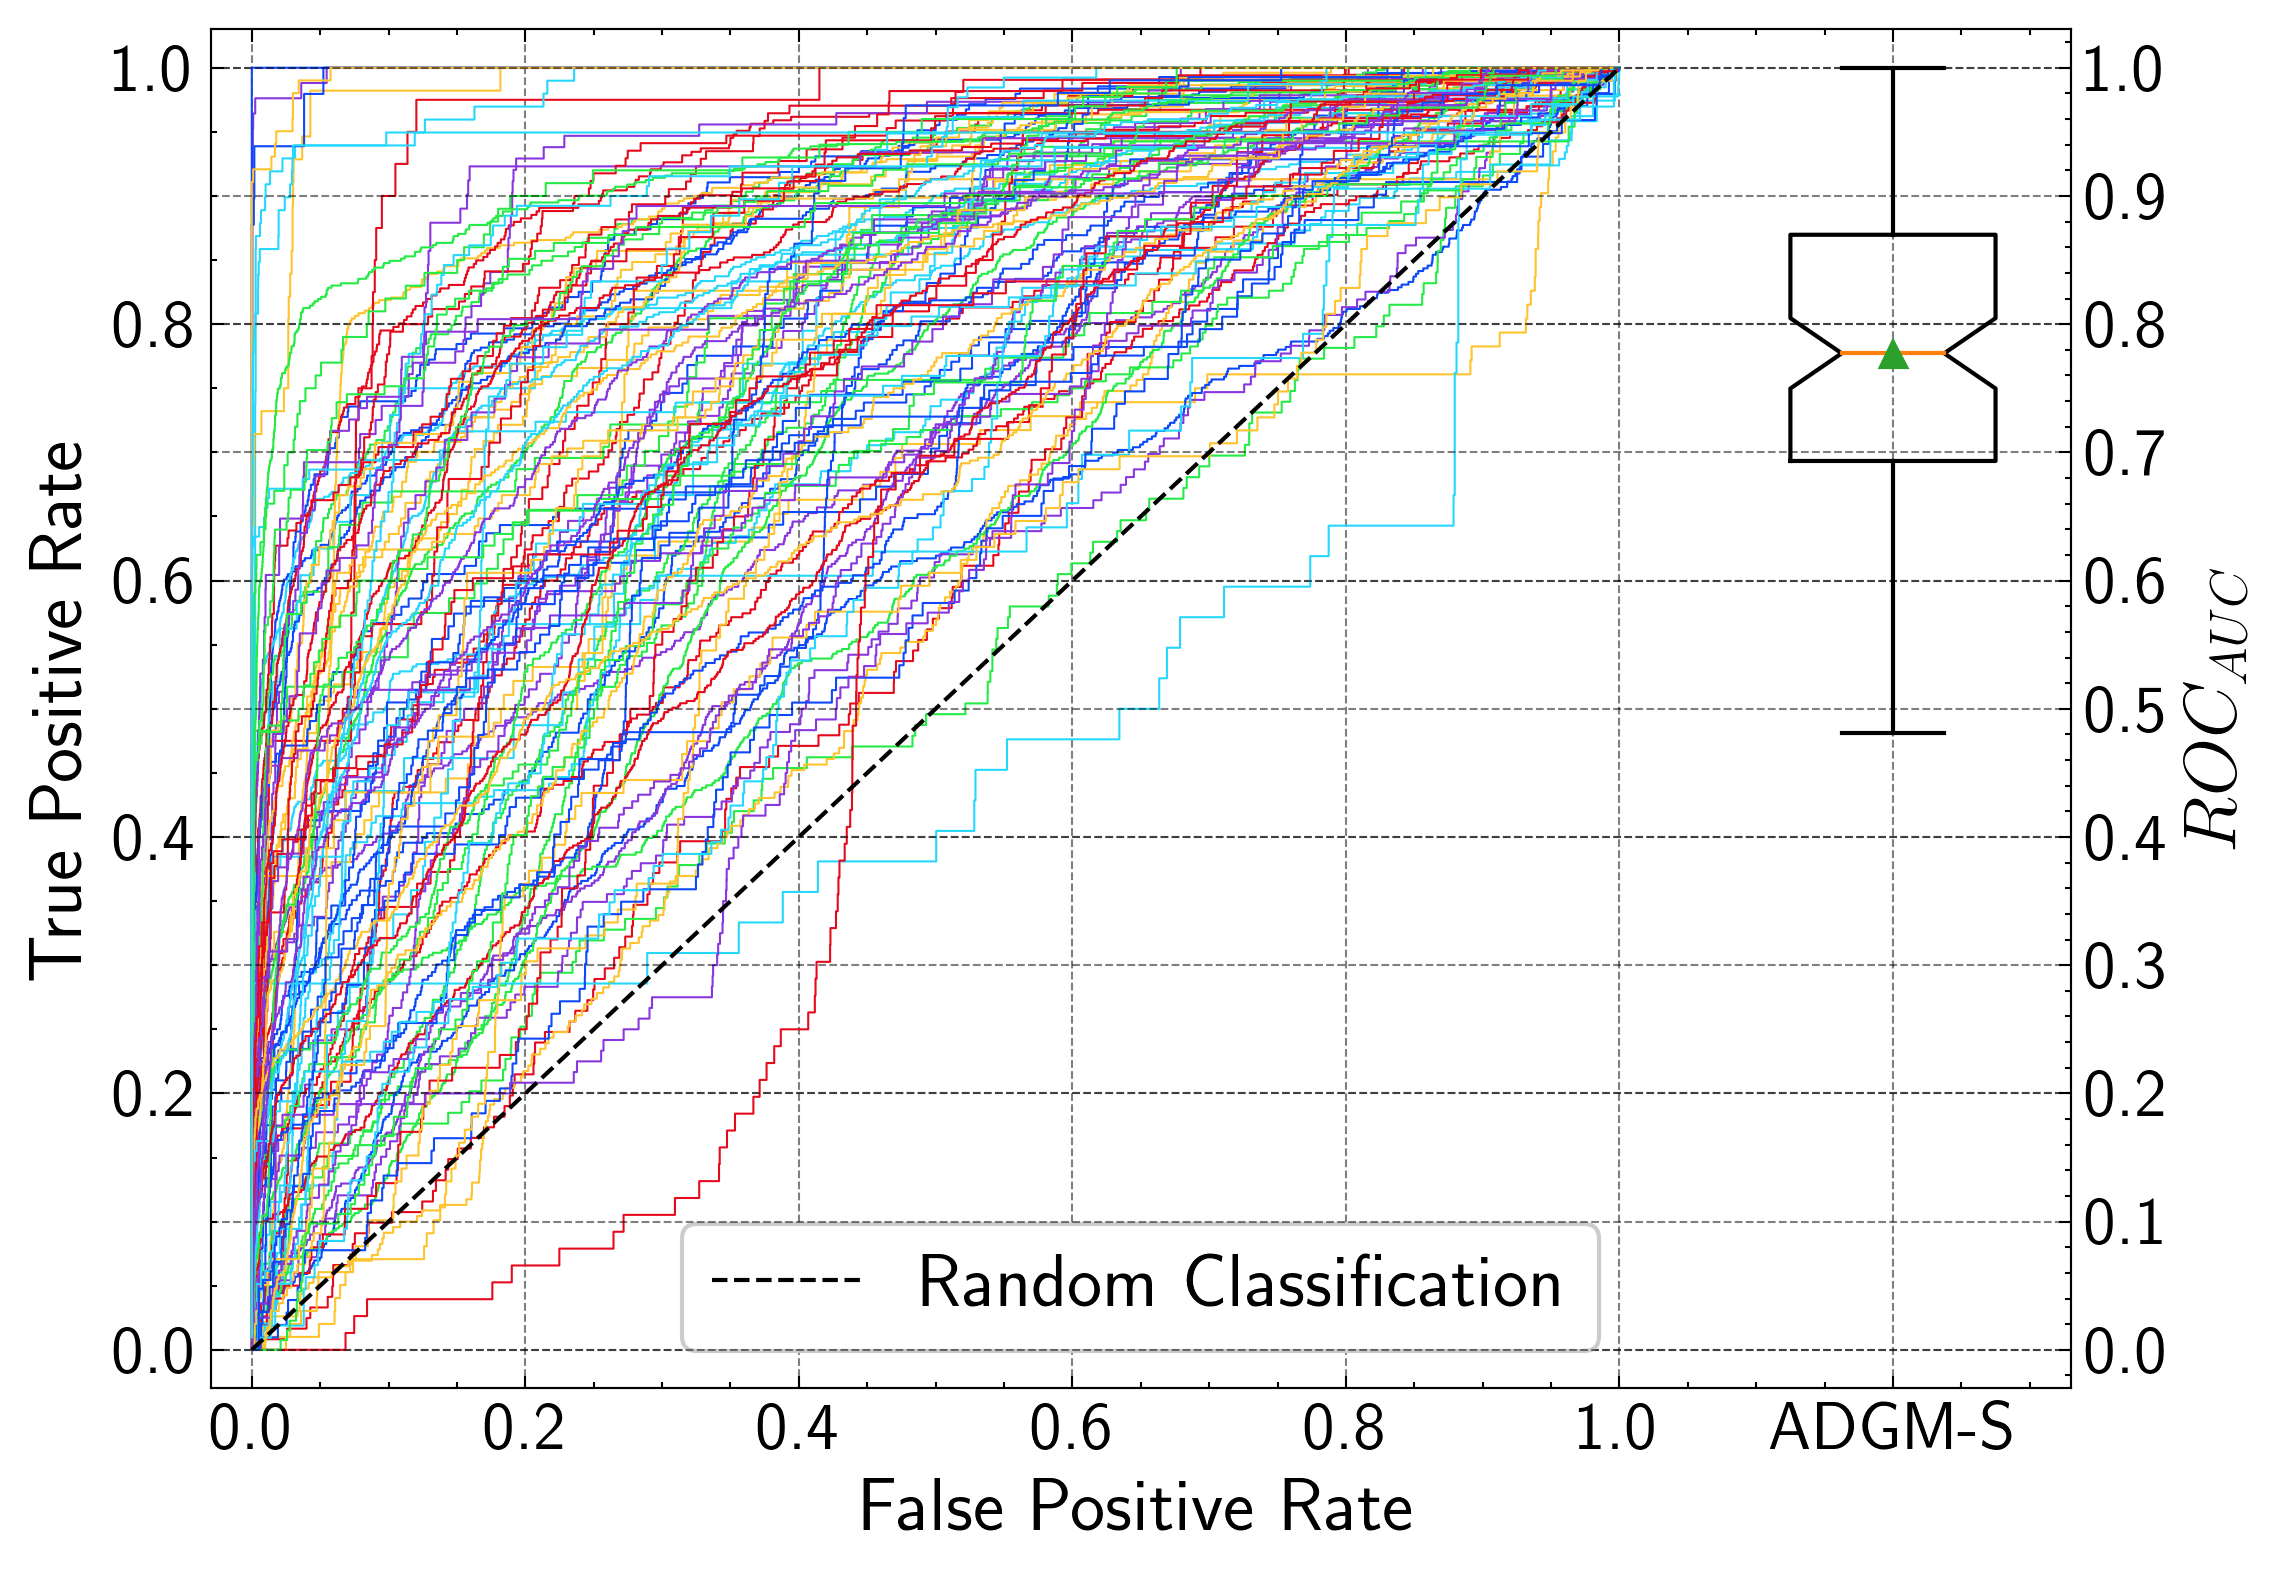

In [66]:
import matplotlib.pyplot as plt
with plt.style.context(['science', "high-vis", "grid"]):
    # pparam = dict(xlabel='False Positive Rate', ylabel='True Positive Rate')
    fig, ax = plt.subplots(dpi=300, figsize=(8,6), sharey=True, sharex=True)
    # ax.set_title("Cluster of ROC curves")
    for pairs in all_fpr_tpr:
        ax.plot(pairs[0], pairs[1], "-", linewidth='0.5')
        
    ax2 = ax.twinx()
    ax2.boxplot(auc, positions=[1.2], notch=True, showmeans=True)
    ax2.set_ylim(bottom=-0.03, top=1.03)
    ax2.set_ylabel("$ROC_{AUC}$", fontsize=18)
    ax.plot(all_fpr_tpr[0][0], all_fpr_tpr[0][0], "k--", label="Random Classification")
    ax.legend(loc=8, fontsize=18)
    ax.autoscale(tight=True)
    # ax.set(**pparam)
    ax.set_xlabel("False Positive Rate", fontsize=18)
    ax.set_ylabel("True Positive Rate", fontsize=18)
    
    ax.set_ylim(bottom=-0.03, top=1.03)
    ax.set_xlim(left=-0.03, right=1.33)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0], fontsize=16)
    ax2.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    ax2.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], fontsize=16)
    ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
    ax.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, "ADGM-S"],fontsize=16)
    
    # ax[1].set_ylim(bottom=-0.03, top=1.03)
    # ax[1].set_xlim(left=-0.03, right=1.03)
    plt.savefig("rigid.svg")

In [28]:
text = """0.76
0.73
0.75
0.49
0.91
0.8
0.7
0.65
0.58
0.66
0.71
0.62
0.71
0.46
0.53
0.77
0.92
0.55
0.8
0.99
0.52
0.58
0.8
0.79
0.85
0.59
0.73
0.46
0.95
0.75
0.96
0.97
0.73
0.96
0.83
0.84
0.71
0.6
0.68
0.95
0.64
0.78
0.6
0.7
0.53
0.85
0.49
0.84
0.71
0.82
0.8
0.9
0.61
0.68
0.77
0.74
0.73
0.69
0.91
0.85
0.55
0.84
0.86
0.72
0.87
0.79
0.56
0.58
0.72
0.63
0.53
0.9
0.74
0.9
0.73
0.57
0.84
0.82
0.88
0.9
0.81
0.79
0.81
0.57
1
0.46
0.83
0.79
0.79
0.93
1
0.67
0.84
0.87
0.83
0.87
0.83
0.92
0.81
0.75
1
0.94
"""

In [29]:
esim = [float(i) for i in text.split()]

In [30]:
len(esim)

102

In [31]:
import numpy as np
categories = all_names
categories = [*categories, categories[0]]

scores = [*auc, auc[0]]
esims = [*esim, esim[0]]

# restaurant_1 = [4, 4, 5, 4, 3]
# restaurant_2 = [5, 5, 4, 5, 2]
# restaurant_3 = [3, 4, 5, 3, 5]
# restaurant_1 = [*restaurant_1, restaurant_1[0]]
# restaurant_2 = [*restaurant_2, restaurant_2[0]]
# restaurant_3 = [*restaurant_3, restaurant_3[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(scores))

thetatick_locs = np.degrees(label_loc)
thetatick_labels = categories
labels=[]
with plt.style.context(['science', "high-vis"]):
# plt.figure(figsize=(8, 8))
    fig = plt.figure(figsize=(10,10), dpi=300)
    ax = plt.axes(polar=True)
    ax.set_rlim(0.4, 1.05)
    ax.plot(label_loc, scores, label="ADGM-LBVS SINGLE")
    ax.plot(label_loc, esims, label="eSim -pscreen") 
    ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.01))
    # ax.set_title('Comparision of AUC Values between ADGM-LBVS SINGLE and eSim -pscreen', size=20, y=1.05) 
    ax.set_thetagrids(thetatick_locs, thetatick_labels)
    labels = []

    for label, angle in zip(ax.get_xticklabels(), thetatick_locs):
        x,y = label.get_position()
        lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                  ha=label.get_ha(), va=label.get_va())
        if 90 < angle < 270:
            lab.set_rotation(angle+180)
        else:
            lab.set_rotation(angle)
        labels.append(lab)
    ax.set_xticklabels([])
    ax.tick_params(pad=10)
    # ax.set_thetagrids(frac=1)
    # lines, labels = ax.set_thetagrids(np.degrees(label_loc), labels=categories)
    plt.savefig("radar.svg")
    plt.show()

NameError: name 'plt' is not defined